In [1]:
import pandas as pd
df = pd.read_csv('social_progress_index.csv')
df.head()

,spi_rank,country,spi_score,basic_human_needs,wellbeing,opportunity,basic_nutri_med_care,water_sanitation,shelter,personal_safety,access_basic_knowledge,access_info_comm,health_wellness,env_quality,personal_rights,personal_freedom_choice,inclusiveness,access_adv_edu
0,1.0,Norway,92.63,95.29,93.30,89.30,98.81,98.33,93.75,90.29,98.66,95.80,89.32,89.44,96.34,91.16,83.77,85.92
1,2.0,Finland,92.26,95.62,93.09,88.07,98.99,99.26,96.48,87.75,96.32,95.14,85.73,95.15,96.13,88.10,82.81,85.23
2,3.0,Denmark,92.15,95.30,92.74,88.41,98.62,98.21,94.92,89.46,97.44,98.18,85.15,90.20,97.08,90.03,81.64,84.89
3,4.0,Iceland,91.78,96.66,93.65,85.04,98.99,98.82,93.16,95.66,99.51,93.12,91.02,90.93,95.14,88.01,77.63,79.39
4,5.0,Switzerland,91.78,95.25,93.80,86.28,98.72,98.96,92.97,90.35,98.60,95.07,91.50,90.05,96.69,90.65,74.81,82.99


In [2]:
df.columns

Index(['spi_rank', 'country', 'spi_score', 'basic_human_needs', 'wellbeing',
       'opportunity', 'basic_nutri_med_care', 'water_sanitation', 'shelter',
       'personal_safety', 'access_basic_knowledge', 'access_info_comm',
       'health_wellness', 'env_quality', 'personal_rights',
       'personal_freedom_choice', 'inclusiveness', 'access_adv_edu'],
      dtype='object')

1. dashboard of major findings & conclusions from the SPI report dataset.

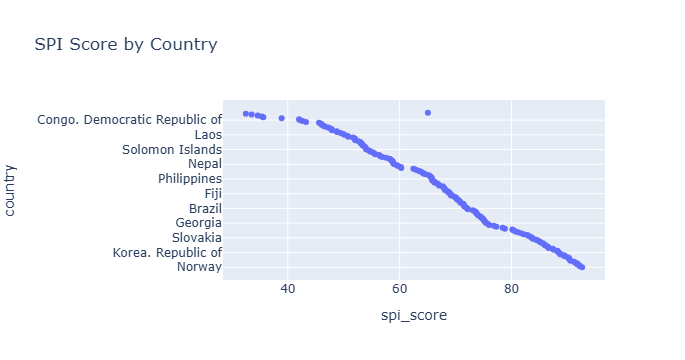

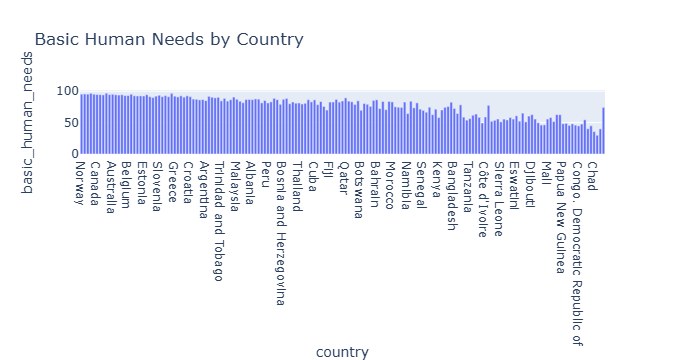

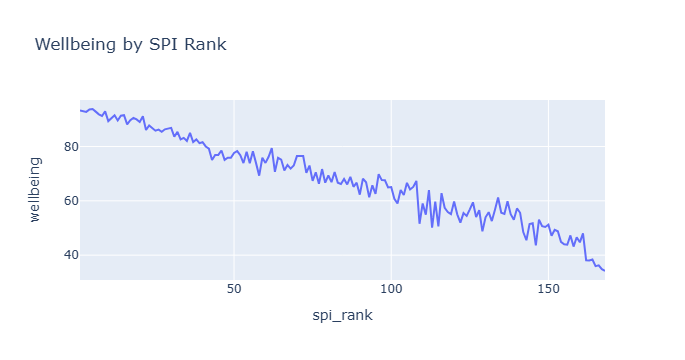

In [4]:
import plotly.express as px

fig1 = px.scatter(df, x='spi_score', y='country', title='SPI Score by Country')
fig2 = px.bar(df, x='country', y='basic_human_needs', title='Basic Human Needs by Country')
fig3 = px.line(df, x='spi_rank', y='wellbeing', title='Wellbeing by SPI Rank')

fig1.show()
fig2.show()
fig3.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   spi_rank                 168 non-null    float64
 1   country                  169 non-null    object 
 2   spi_score                169 non-null    float64
 3   basic_human_needs        169 non-null    float64
 4   wellbeing                169 non-null    float64
 5   opportunity              169 non-null    float64
 6   basic_nutri_med_care     169 non-null    float64
 7   water_sanitation         169 non-null    float64
 8   shelter                  169 non-null    float64
 9   personal_safety          169 non-null    float64
 10  access_basic_knowledge   169 non-null    float64
 11  access_info_comm         169 non-null    float64
 12  health_wellness          169 non-null    float64
 13  env_quality              169 non-null    float64
 14  personal_rights          1

2. TOP 3 biggest Areas of Underperformance in the World

inclusiveness     46.802840
access_adv_edu    54.188166
opportunity       58.381657
dtype: float64


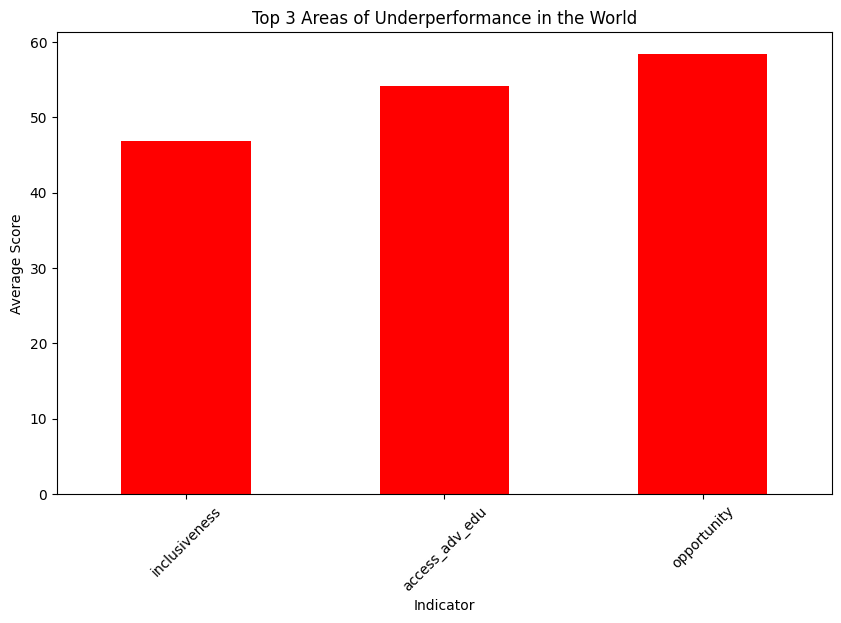

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_df = df.select_dtypes(include='float64')
avg_scores = numeric_df.mean()
avg_scores = avg_scores.drop('spi_rank', errors='ignore')
top_3_underperforming = avg_scores.nsmallest(3)

print(top_3_underperforming)
plt.figure(figsize=(10, 6))
top_3_underperforming.plot(kind='bar', color='red')
plt.title('Top 3 Areas of Underperformance in the World')
plt.xlabel('Indicator')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()



3. TOP 3 biggest Areas of improvement in the World

basic_nutri_med_care    84.705976
shelter                 77.088166
basic_human_needs       76.142959
dtype: float64


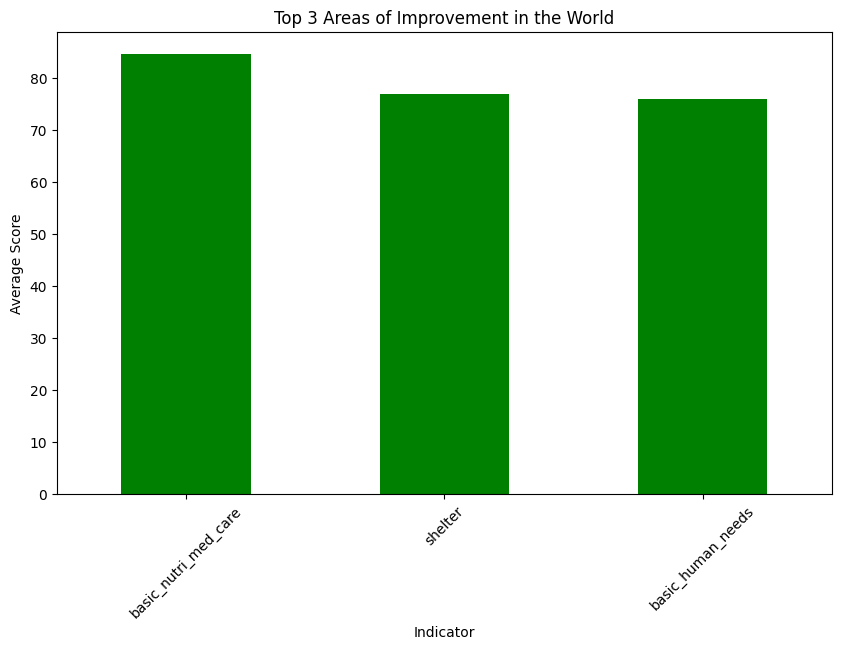

In [42]:
#3
top_3_improving = avg_scores.nlargest(3)

plt.figure(figsize=(10, 6))
top_3_improving.plot(kind='bar', color='green')
print(top_3_improving)
plt.title('Top 3 Areas of Improvement in the World')
plt.xlabel('Indicator')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

4.  TOP 5 countries, choose any 2 countries of your choice to compare them 
on the basis of Health & Education indicators.

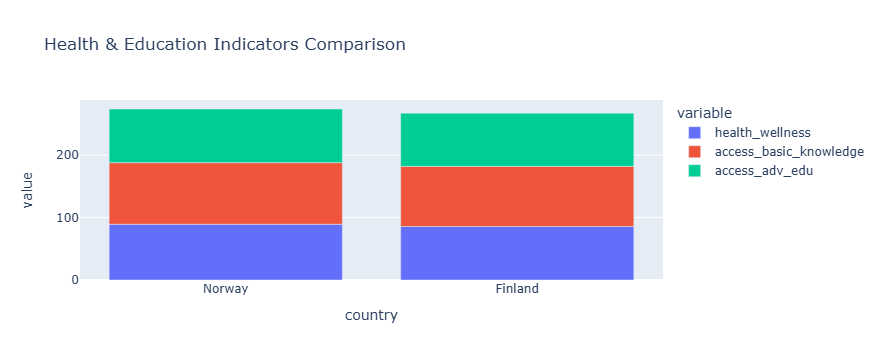

In [18]:
selected_countries = df.nlargest(5, 'spi_score').iloc[:2]

health_education = selected_countries[['country', 'health_wellness', 'access_basic_knowledge', 'access_adv_edu']]

fig = px.bar(health_education, x='country', y=['health_wellness', 'access_basic_knowledge', 'access_adv_edu'],
             title='Health & Education Indicators Comparison')
fig.show()

5. Choose One country & visualize its performance, showing where the country performed 
well & where it needs improvement.

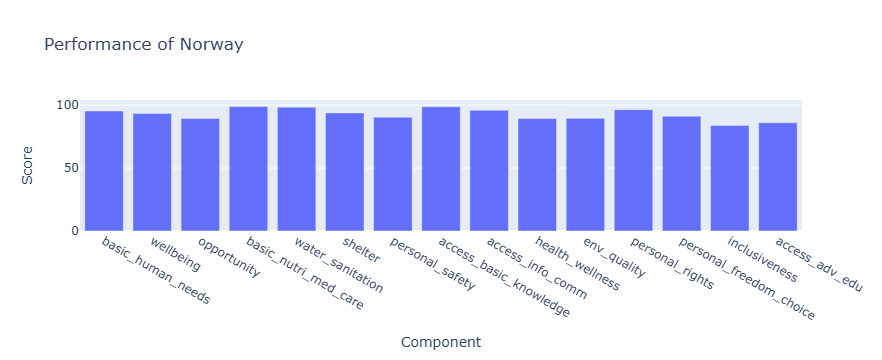

In [30]:
import plotly.express as px
country_name = 'Norway'
country_data = df[df['country'] == country_name]

if not country_data.empty:
    components = df.columns[3:]
    scores = country_data[components].iloc[0].values

    plot_data = pd.DataFrame({
        'Component': components,
        'Score': scores
    })

    fig = px.bar(plot_data, x='Component', y='Score',
                 title=f'Performance of {country_name}')
    fig.show()
else:
    print(f"Country '{country_name}' not found in the dataset.")

6. Which components are the major contributors to the SPI score

Top 3 Contributors to SPI Score:
wellbeing           0.982921
access_info_comm    0.937101
opportunity         0.934232
Name: spi_score, dtype: float64


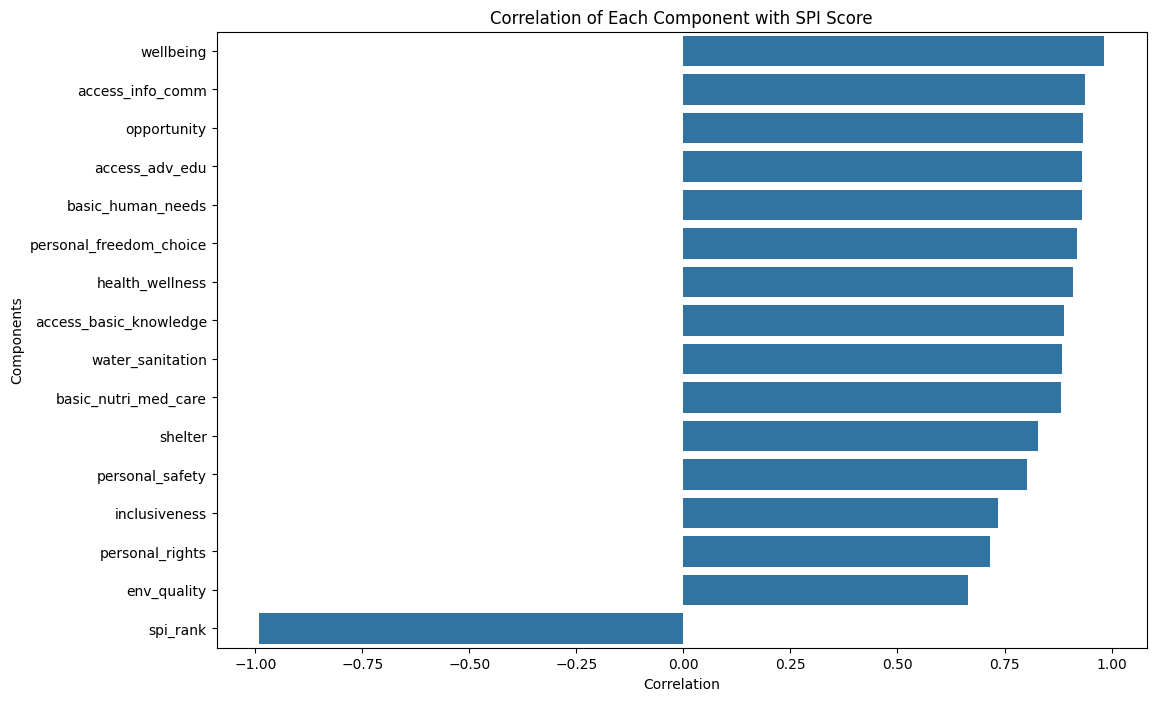

In [29]:
# 6
numeric_df = df.select_dtypes(include=[float, int])

correlation = numeric_df.corr()['spi_score'].sort_values(ascending=False)

correlation = correlation.drop('spi_score')

top_contributors = correlation.head(3)
print("Top 3 Contributors to SPI Score:")
print(top_contributors)

plt.figure(figsize=(12, 8))
sns.barplot(x=correlation.values, y=correlation.index)
plt.title('Correlation of Each Component with SPI Score')
plt.xlabel('Correlation')
plt.ylabel('Components')
plt.show()

7. Weightages of Each Component to Calculate the SPI Score

<Figure size 1000x600 with 0 Axes>

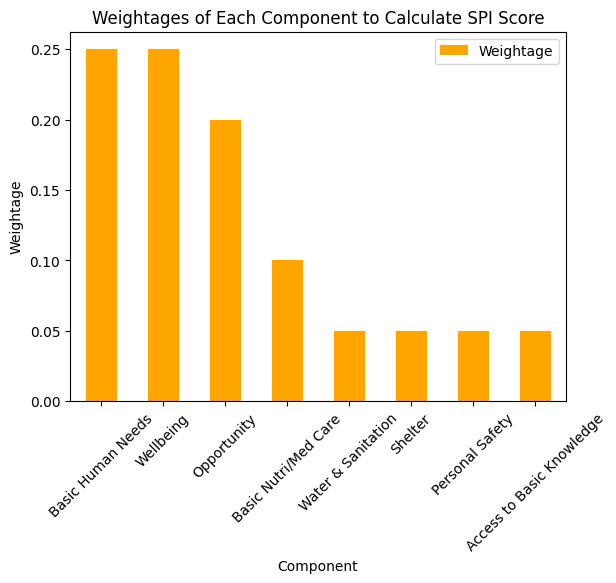

In [11]:
# 7
weightages = {
    'Basic Human Needs': 0.25,
    'Wellbeing': 0.25,
    'Opportunity': 0.20,
    'Basic Nutri/Med Care': 0.10,
    'Water & Sanitation': 0.05,
    'Shelter': 0.05,
    'Personal Safety': 0.05,
    'Access to Basic Knowledge': 0.05
}

weightages_df = pd.DataFrame(list(weightages.items()), columns=['Component', 'Weightage'])

plt.figure(figsize=(10, 6))
weightages_df.set_index('Component').plot(kind='bar', color='orange')
plt.title('Weightages of Each Component to Calculate SPI Score')
plt.ylabel('Weightage')
plt.xticks(rotation=45)
plt.show()


8. If you are a new country in the South American continent, which components according 
to you will be the major contributors to your SPI score, and which components would 
need your special attention?

Top Contributors : Index(['wellbeing', 'access_info_comm', 'opportunity'], dtype='object')


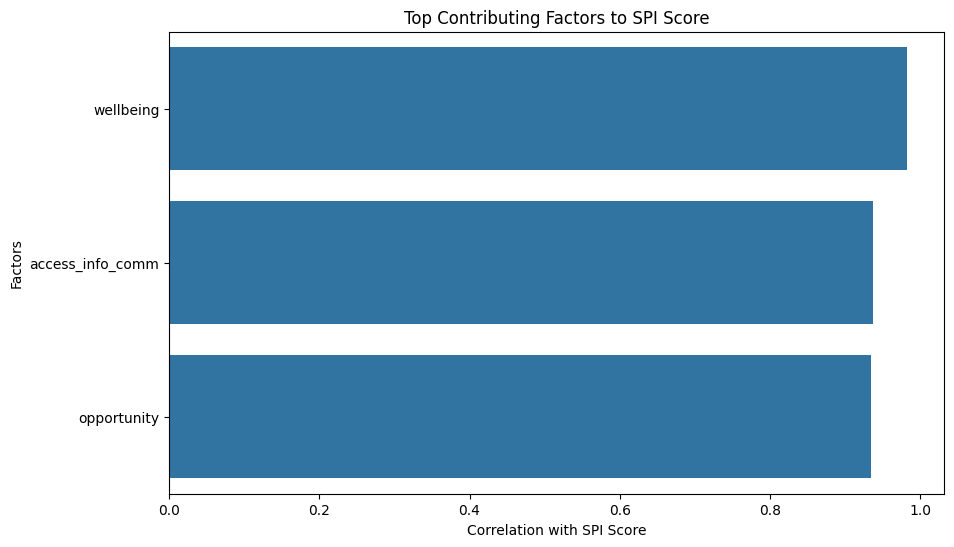

Attention areas :  ['personal_safety', 'inclusiveness', 'env_quality']


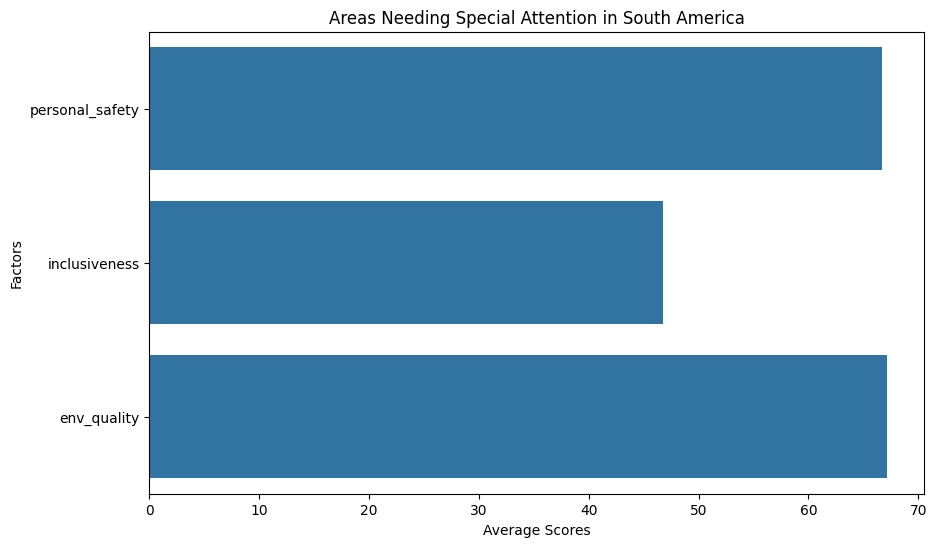

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=[float, int])

correlation = numeric_df.corr()['spi_score'].sort_values(ascending=False)

top_contributors = correlation.index[1:4]

attention_areas = ['personal_safety', 'inclusiveness', 'env_quality']

attention_means = df[attention_areas].mean()
print("Top Contributors :",top_contributors)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation[top_contributors], y=top_contributors)
plt.title('Top Contributing Factors to SPI Score')
plt.xlabel('Correlation with SPI Score')
plt.ylabel('Factors')
plt.show()
print("Attention areas : ",attention_areas)
plt.figure(figsize=(10, 6))
sns.barplot(x=attention_means.values, y=attention_means.index)
plt.title('Areas Needing Special Attention in South America')
plt.xlabel('Average Scores')
plt.ylabel('Factors')
plt.show()

9.Effect of COVID-19 on SPI Scores (Hypothetical)

Average SPI score before COVID-19: 67.43
Average SPI score after COVID-19: 65.96
Impact of COVID-19 on SPI score: 1.47


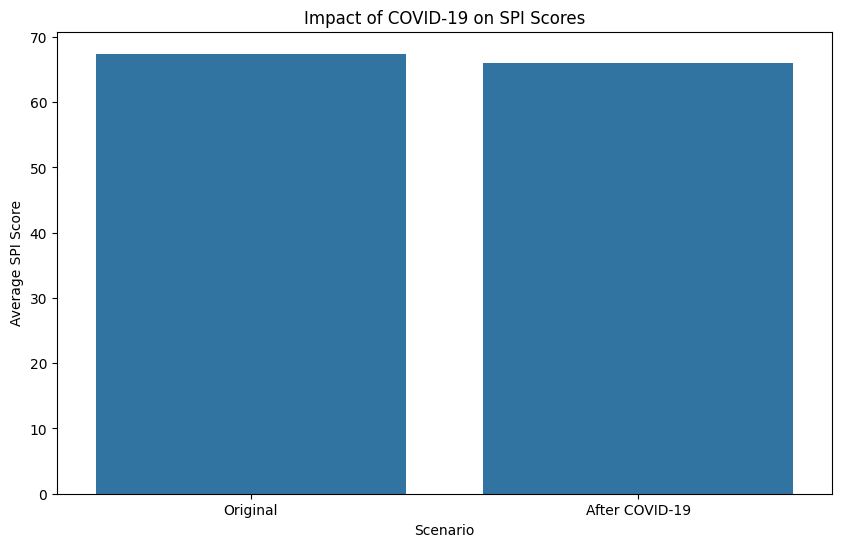

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_covid_impact(df):
    covid_impact_factors = {
        'health_wellness': 0.85,
        'personal_safety': 0.90,
        'basic_human_needs': 0.92
    }
    
    df_covid_impact = df.copy()
    
    for col, factor in covid_impact_factors.items():
        df_covid_impact[col] *= factor
    
    df_covid_impact['spi_score'] = df_covid_impact.iloc[:, 3:].mean(axis=1)
    
    return df_covid_impact

df_covid_impact = simulate_covid_impact(df)
covid_avg_spi_score = df_covid_impact['spi_score'].mean()

print(f"Average SPI score before COVID-19: {df['spi_score'].mean():.2f}")
print(f"Average SPI score after COVID-19: {covid_avg_spi_score:.2f}")
print(f"Impact of COVID-19 on SPI score: {df['spi_score'].mean() - covid_avg_spi_score:.2f}")

plt.figure(figsize=(10, 6))
scores = [df['spi_score'].mean(), covid_avg_spi_score]
labels = ['Original', 'After COVID-19']
sns.barplot(x=labels, y=scores)
plt.title('Impact of COVID-19 on SPI Scores')
plt.xlabel('Scenario')
plt.ylabel('Average SPI Score')
plt.show()

10. Impact of a War between an Asian and a European Country on Global SPI Score (Hypothetical)

Average SPI score before war: 67.43
Average SPI score after war: 65.47
Impact of war on SPI score: 1.97


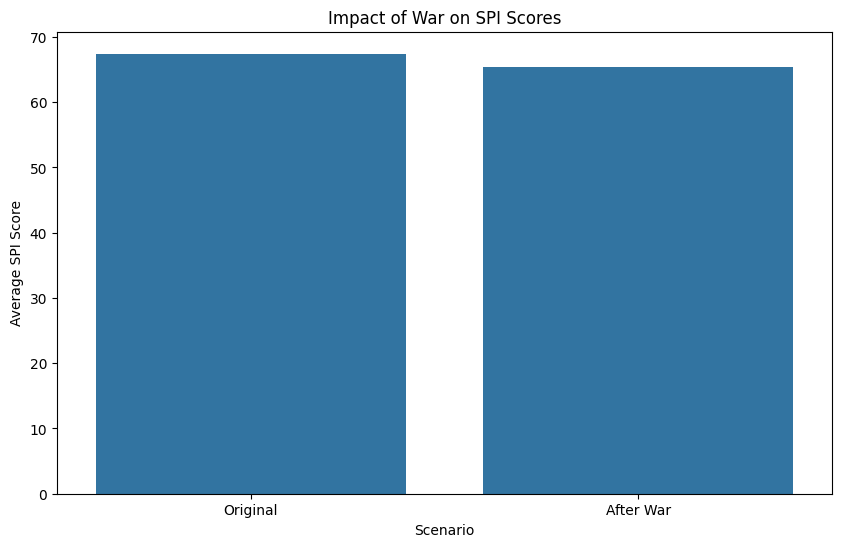

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_war_impact(df):
    war_impact_factors = {
        'personal_safety': 0.80,
        'inclusiveness': 0.85,
        'basic_human_needs': 0.88
    }
    df_war_impact = df.copy()
    for col, factor in war_impact_factors.items():
        df_war_impact[col] *= factor
    df_war_impact['spi_score'] = df_war_impact.iloc[:, 3:].mean(axis=1)
    return df_war_impact

df_war_impact = simulate_war_impact(df)
war_avg_spi_score = df_war_impact['spi_score'].mean()

print(f"Average SPI score before war: {df['spi_score'].mean():.2f}")
print(f"Average SPI score after war: {war_avg_spi_score:.2f}")
print(f"Impact of war on SPI score: {df['spi_score'].mean() - war_avg_spi_score:.2f}")

plt.figure(figsize=(10, 6))
scores = [df['spi_score'].mean(), war_avg_spi_score]
labels = ['Original', 'After War']
sns.barplot(x=labels, y=scores)
plt.title('Impact of War on SPI Scores')
plt.xlabel('Scenario')
plt.ylabel('Average SPI Score')
plt.show()

11. Which global issue must be addressed as the highest priority according to this SPI score 
& why

Highest Priority Global Issues: ['inclusiveness', 'access_adv_edu', 'opportunity']


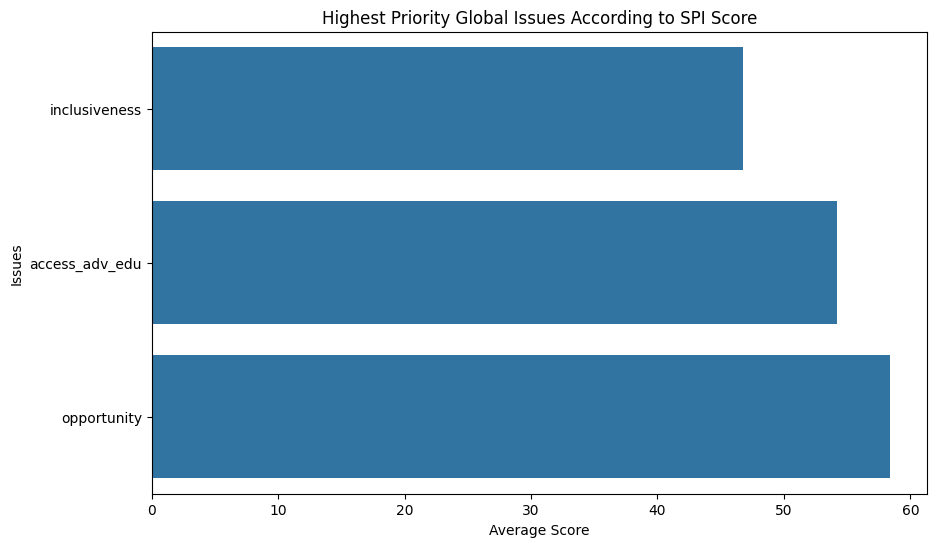

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=[float, int])
average_scores = numeric_df.mean().sort_values()
highest_priority_issues = average_scores.index[:3]
print("Highest Priority Global Issues:", highest_priority_issues.tolist())
plt.figure(figsize=(10, 6))
sns.barplot(x=average_scores[highest_priority_issues], y=highest_priority_issues)
plt.title('Highest Priority Global Issues According to SPI Score')
plt.xlabel('Average Score')
plt.ylabel('Issues')
plt.show()